### import the necessery libraries

In [1]:
import pandas as pd
import glob
from numpy import NAN

### merging 12 month of sales data into one file

In [2]:
csv_files = glob.glob('Sales_Data\*.csv')

merged_files = pd.DataFrame()
for file in csv_files:
    df = pd.read_csv(file)
    merged_files = merged_files.append(df,ignore_index=True)

# merged_files.to_csv('merged_data/merged_files.csv',index=False)

C:\Users\Rasool\AppData\Local\Temp\ipykernel_13192\3625739774.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_files = merged_files.append(df,ignore_index=True)
C:\Users\Rasool\AppData\Local\Temp\ipykernel_13192\3625739774.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_files = merged_files.append(df,ignore_index=True)
C:\Users\Rasool\AppData\Local\Temp\ipykernel_13192\3625739774.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_files = merged_files.append(df,ignore_index=True)
C:\Users\Rasool\AppData\Local\Temp\ipykernel_13192\3625739774.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_files = me

## Read in update datframe

In [3]:
merged_files = pd.read_csv('merged_data/merged_files.csv')
merged_files.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Adding some additionak collomns

#### Removing the nan

In [4]:
new_files = merged_files.dropna()
new_files.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Adding the month collomn

In [5]:
new_files['month'] = new_files['Order Date'].str[0:2]
new_files.head()

C:\Users\Rasool\AppData\Local\Temp\ipykernel_13192\2441720258.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_files['month'] = new_files['Order Date'].str[0:2]


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


#####  Deleting the mistaken datas

In [6]:
temp_df =  new_files[new_files['month'].str[0:2] == 'Or']
index_df = temp_df.index
temp_df = new_files.drop(index_df)
temp_df[temp_df['month'].str[0:2] == 'Or']


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month


### convertung the dtype of the month collomn to integer

In [7]:
temp_df['month'] = temp_df['month'].astype('int32')
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Adding tha sale collomn

##### sale = Quantity Orderd * Price Each

In [14]:
from time import time


In [34]:
# temp_df['Price Each'] = temp_df['Price Each'].astype('float32')
t = time() 
temp_df['Price Each'] = pd.to_numeric(temp_df['Price Each'])
# temp_df['Quantity Ordered'] = temp_df['Quantity Ordered'].astype('int64')
temp_df['Quantity Ordered'] = pd.to_numeric(temp_df['Quantity Ordered'])
print(time()-t)

0.007983684539794922


In [42]:
# t = time()
# temp_df['Price Each'] = temp_df['Price Each'].astype('float32')
# temp_df['Quantity Ordered'] = temp_df['Quantity Ordered'].astype('int64')
# print(time()-t)


0.007997512817382812


In [12]:
temp_df['Sales'] = temp_df['Quantity Ordered'] * temp_df['Price Each']
temp_df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales
0,176558,USB-C Charging Cable,2,11.950000,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.900000
2,176559,Bose SoundSport Headphones,1,99.989998,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.989998
3,176560,Google Phone,1,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.000000
4,176560,Wired Headphones,1,11.990000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.990000
5,176561,Wired Headphones,1,11.990000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.990000


In [46]:
result = temp_df.groupby('month').sum()


C:\Users\Rasool\AppData\Local\Temp\ipykernel_13192\2710509073.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result = temp_df.groupby('month').sum()


In [47]:
import matplotlib.pyplot as plt 

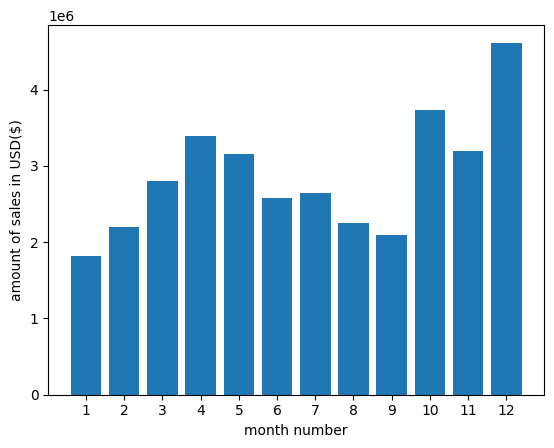

In [51]:
month = range(1,13)
plt.bar(month, result['Sales'])
plt.xticks(month)
plt.xlabel('month number')
plt.ylabel('amount of sales in USD($)')
plt.show()